In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import warnings
warnings.simplefilter('ignore')

In [16]:
data = pd.read_csv("../data/vgsales.csv")

# Перетворення в категоричні

In [17]:
categorical_columns = data.select_dtypes(include=['object']).columns

map_dicts = dict()
for column in categorical_columns:
    data[column] = data[column].astype('category')
    map_dicts[column] = dict(zip(data[column], data[column].cat.codes))
    data[column] = data[column].cat.codes

## Regression

In [18]:
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [19]:
# Let's predict  RoamingCalls

y_column = 'Global_Sales'

X_columns = ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
X = data[X_columns]
y = data[y_column]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
models = {
'LinearRegression' : LinearRegression(),
'LGBMRegressor' :LGBMRegressor(),
'SGDRegressor' :SGDRegressor(),
'RandomForestRegressor' :RandomForestRegressor(),
'ElasticNet' :ElasticNet(),
'BayesianRidge' :BayesianRidge(),
'GradientBoostingRegressor' :GradientBoostingRegressor(),
'SVR' :SVR(),
}

In [22]:
regressors = dict()
for name, model in models.items():
    print('training ',name)
    regressor = model
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(metrics.mean_absolute_error(y_test, y_pred))
    print(metrics.mean_absolute_percentage_error(y_test, y_pred))
    regressors[name] = regressor


training  LinearRegression
0.0030499692944797553
0.029956391345971473
training  LGBMRegressor
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1285
[LightGBM] [Info] Number of data points in the train set: 11403, number of used features: 9
[LightGBM] [Info] Start training from score 0.535119
0.04205061019325292
0.07689409641392851
training  SGDRegressor
1.0122556231029366e+16
1.469697406222586e+17
training  RandomForestRegressor
0.036940425531914914
0.05048948821768828
training  ElasticNet
0.4645431017939253
5.1735514771387745
training  BayesianRidge
0.003049974305394141
0.02995646537861363
training  GradientBoostingRegressor
0.04040540780819453
0.14336302977546594
training  SVR
0.48427793596844804
2.361035668381702


### В результаті можна побачити, що RandomForestRegressor є найкращим методом серед всіх

##### Використаємо 3 метрики:
-Mean Absolute Error
-Mean Squared Error
-Root mean squared error

In [23]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))

0.03758614975450082
0.5283629308776596
0.842151959195378


Feature ranking:
1. NA_Sales (0.820415)
2. EU_Sales (0.133801)
3. JP_Sales (0.030634)
4. Other_Sales (0.009576)
5. Name (0.001542)
6. Platform (0.001484)
7. Year (0.001119)
8. Genre (0.001010)
9. Publisher (0.000419)


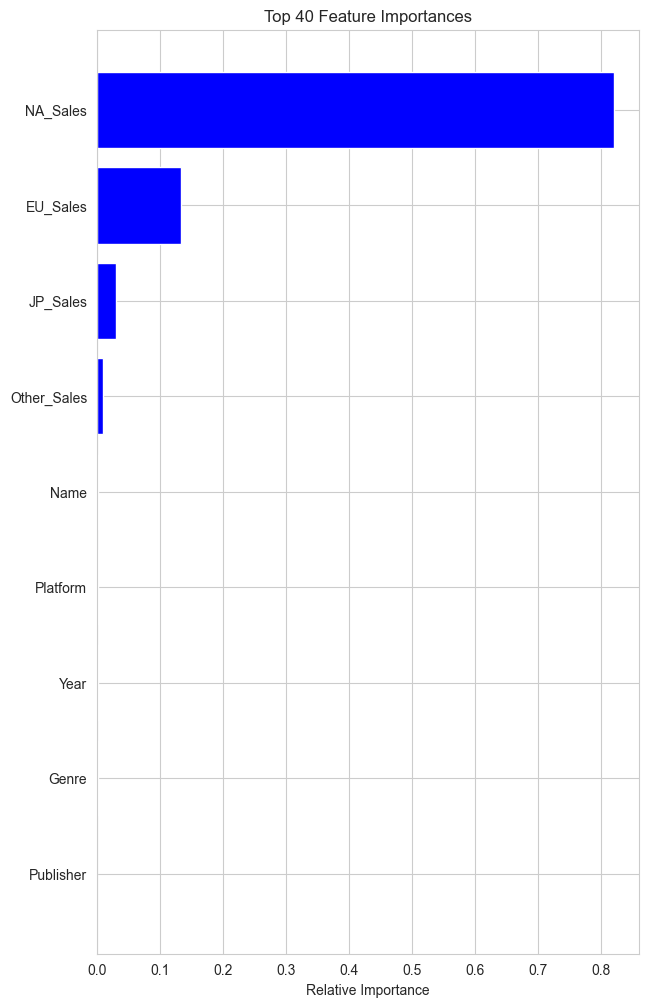

In [24]:
# Assuming random_forest_model is already defined and trained
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

top_40_indices = indices[:40]
top_40_features = [X_columns[i] for i in top_40_indices]
top_40_importances = importances[top_40_indices]

plt.figure(figsize=(7, 12))
plt.title('Top 40 Feature Importances')
plt.barh(range(len(top_40_indices)), top_40_importances, color='b', align='center')
plt.yticks(range(len(top_40_indices)), top_40_features)
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()